# HUMAN ACTIVITY RECOGNITION

In this project, we elaborate on human activity recognition tracked by wearable shoe insoles that
have several sensors on them. The project's objective is to accurately predict a range of human activities.
The dataset is provided by a start-up company, Embry Tech, that has collected movement data among
several experiment participants. The methods used in the model building process are Correlation Analysis,
PCA, Binary Logistic Regression, Decision Tree, Random Forest and finally a Catboost Classifier for
multiclass classification. The findings illustrate that accurate prediction remains a complex task and while
very different activities such as sitting and running are easily distinguishable, more mixed activities such as
mixed walking and mixed walking that includes stairs up are more arduous to differentiate between

8 participants with different gender, age, height, and weight were recruited to perform 12 types of
activities: walking, mixed walking, jogging, climbing down, climbing up, stairs up, stairs down, mixed walking
that included stairs up movement, mixed walking with little pauses, standing, sitting and no activity at all.

In [2]:
import sys; sys.path.insert(0, 'c:/users/ofir6/desktop/projects/HAR_new/')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import pre_process
from src.config import data_raw_path
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(data_raw_path, index_col=0)
df.head(2)

,s1_mean,s2_mean,s3_mean,x_mean,y_mean,z_mean,s1_variation,s2_variation,s3_variation,x_variation,...,x_peak_prom_stand,y_peak_prom_sit,y_peak_prom_stand,x_y_corr,z_y_corr,x_z_corr,id,Name,Kg,Target
0,91.0025,88.8400,127.6475,178.6475,-58.6525,-1331.735,1.408888,0.891958,1.271568,5.805104,...,16.700311,11.316770,11.316770,-0.810465,0.260219,-0.356973,user_1,a,89.2,Walking
1,90.1400,81.1725,140.3850,148.8150,-20.3150,-1343.855,1.308428,0.836050,1.250638,6.742590,...,17.788430,11.424793,11.424793,-0.752337,0.284737,-0.337889,user_2,a,89.2,Walking


The dataset consisted of pressure and acceleration features that were captured by the sensors inside the insoles. The data were captured in three different locations inside the shoe insole resulting in effective vector data. For the purposes of feature engineering , first physical features were created. These were derived based on the physical interpretations of human motion. 

Specifically, two measures that are known to be significant predictors in HAR were computed

<img src='images/image1.jpg' width="500"/>

This feature is independent of the orientation of the sensing device, and measures the instantaneous intensity of human movements at index t

<img src='images/image2.jpg' width="700"/>

The acceleration magnitude summed over three axes within each window normalized by the window length.
This feature has been used in previous studies and is regarded as an indirect estimation of energy
expenditure.

In [3]:
df = pre_process(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 2407
Columns: 121 entries, s1_mean to stdovermean3
dtypes: float64(101), int64(18), object(2)
memory usage: 2.2+ MB


**Descriptive Analysis**

Secondly, From these mechanical motion measurements different statistical parameters were computed. Through feature transformation a total of 122 features were gathered. Some commonly used features such as mean, variance, correlation and entropy were used. A few statistical measures were added such as mean over st.deviation of pressure. Some of them have been intensively investigated in previous studies and proved to be useful for activity recognition . For example, variance has been proved to achieve consistently high accuracy to differentiate activities such as walking, jogging, and hopping. On the other hand, Correlation between each pair of sensor axes helps differentiate activities that involve movement in a single dimension such as walking and running from the ones that involve movement in multi-dimension such as stair climbing.

In [8]:
df.describe()

,s1_mean,s2_mean,s3_mean,x_mean,y_mean,z_mean,s1_variation,s2_variation,s3_variation,x_variation,...,y_peak_prom_stand,x_y_corr,z_y_corr,x_z_corr,Kg,intensity,magnitude,stdovermean1,stdovermean2,stdovermean3
count,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,...,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000
mean,67.333220,46.546945,54.093338,174.347082,32.872267,-865.023091,0.912361,2.313199,1.246932,4.887602,...,4.609469,-0.309089,0.012921,-0.169316,63.812168,128.544277,-65.780374,3.795051,1.167127,-33.110362
std,36.172414,29.077740,41.319862,114.281857,113.398885,950.715905,22.508131,38.511866,4.589454,8.101204,...,4.048368,0.441664,0.249078,0.329147,12.181424,23.832157,97.962802,12.867751,11.922553,84.463746
min,-17.090000,-15.403750,-15.337500,-531.967500,-508.355000,-2209.037500,-1098.141072,-140.899750,-115.726957,-231.225070,...,0.000000,-0.958914,-0.954300,-0.947648,52.000000,72.824999,-188.933250,-148.191302,-151.763990,-362.906654
25%,46.126559,27.452500,10.064509,97.859739,-69.785000,-1403.010476,1.096088,0.991677,0.419846,2.479409,...,0.000000,-0.640489,-0.137875,-0.404316,53.500000,102.567879,-117.231301,1.124048,-0.874795,-17.736953
50%,67.611523,47.252808,56.271644,176.081278,49.955206,-1227.791250,1.312785,1.345413,1.278816,4.645390,...,5.482471,-0.478998,0.030955,-0.281473,63.700000,133.178591,-98.548616,1.646823,0.571191,-12.165795
75%,90.984809,66.601562,74.254446,230.855360,114.811563,-982.281875,1.761023,1.876336,1.628066,6.478402,...,7.087208,-0.036298,0.181931,0.021127,63.700000,144.000239,-79.629000,3.568488,1.211837,-9.636322
max,238.155689,230.512974,302.381238,632.875000,603.715000,1741.845000,25.304658,1772.503879,137.673569,219.930945,...,24.857143,0.974355,0.940266,0.942150,89.200000,228.944748,218.399500,141.385988,169.956511,302.566483


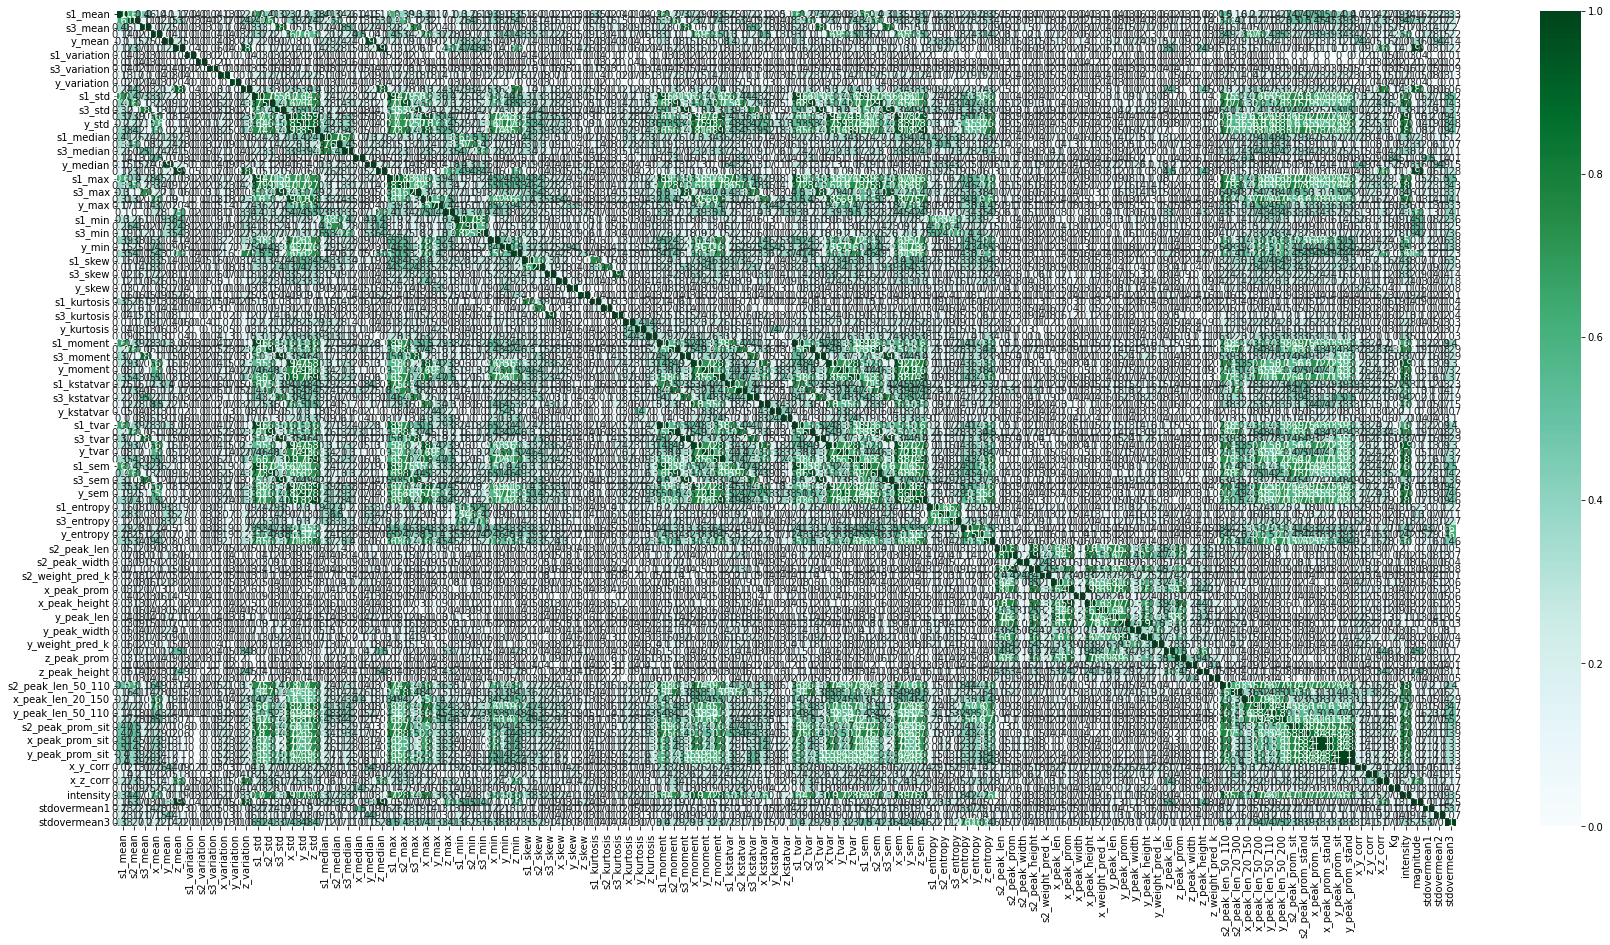

In [9]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr().abs().round(2),annot=True, cmap = "BuGn")
plt.show()

**correlation**

The problem, however, was that some of the features were irrelevant and redundant, showing high correlation with other features. These features were not adding new information to improve the classification accuracy, as well as the high dimensionality was confusing the classifiers rather than helping them. The image below shows the pairwise correlation of features. Dark greens represent correlation of more than 0.75.

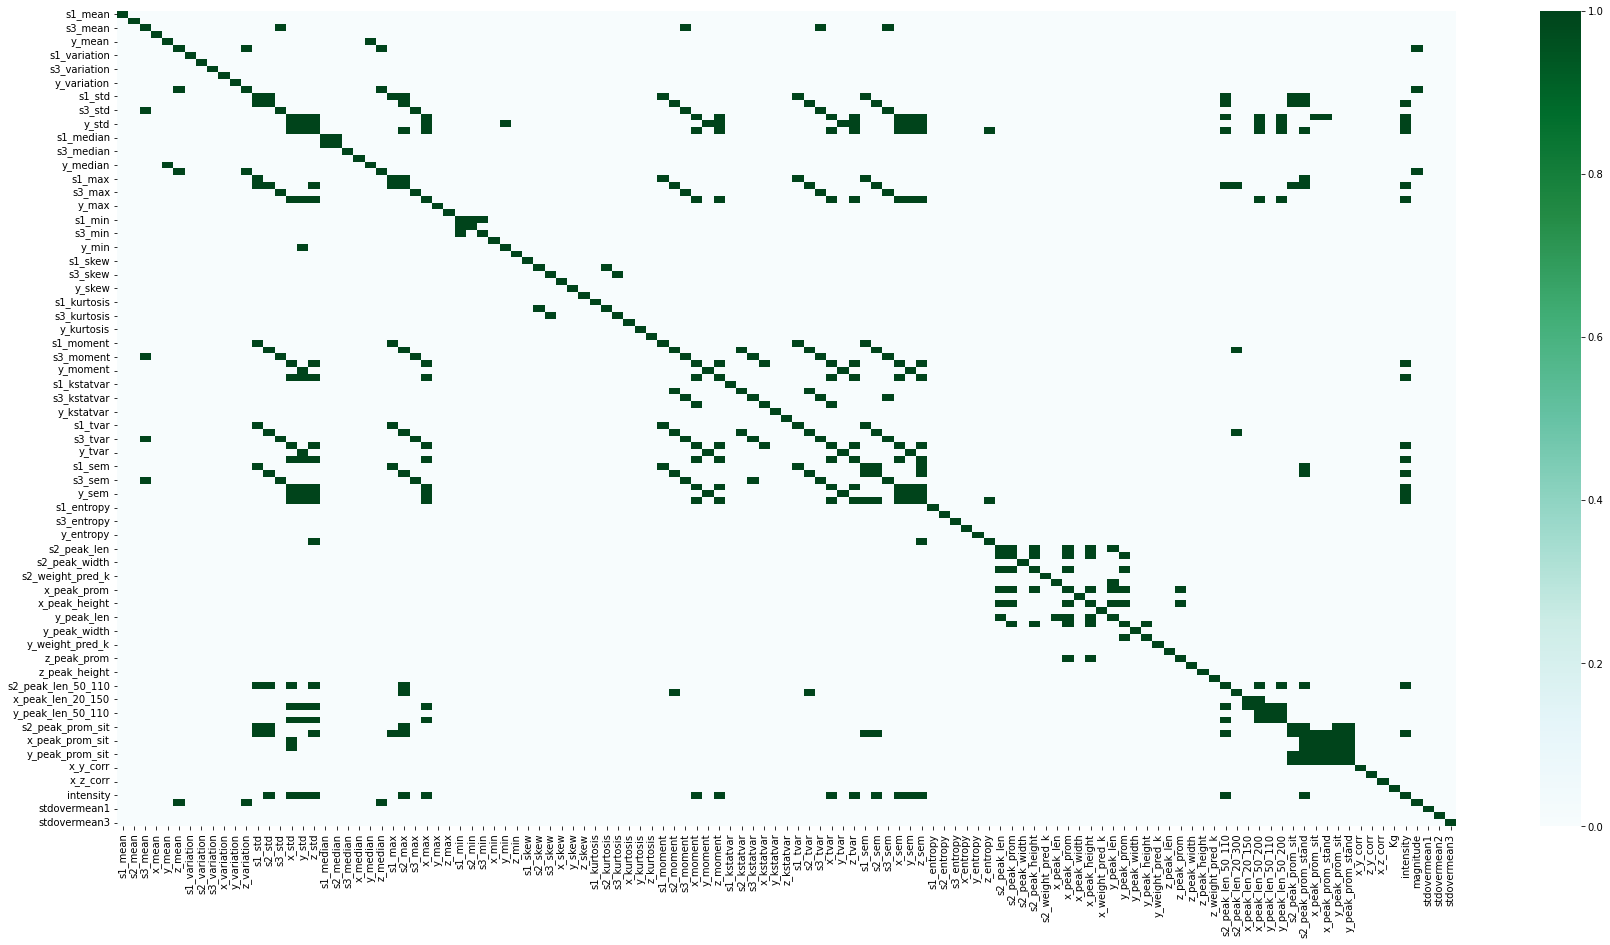

In [10]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr().abs()>=0.75, cmap = "BuGn")
plt.show()

To achieve the best classification performance the dimensionality was reduced. We used a correlation-based feature selection method to select a subset of features. All the variables that had a correlation of more than 0.75 were excluded from the set. Only complementary features were kept. This is important not only in terms of more accurate prediction, but also it may result in less computational costs for the company

In [11]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", df.duplicated().sum())
print("Missing values:", df.isna().sum().sum())
print("Single valued columns:", df.columns[df.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


In [12]:
#the benchmark for Target 
df.Target.value_counts(normalize=True).mul(100).rename("Target percentage")

Walking                               26.121262
Mixed walking                         26.121262
Sitting                               10.672757
Standing                               9.593023
Jogging                                8.098007
Climbing down                          5.481728
Climbing up                            4.983389
Stairs up                              4.360465
Stairs down                            2.657807
Mixed walking  with little pauses      0.789037
Mixed walking  includes stairs up      0.622924
No activity                            0.498339
Name: Target percentage, dtype: float64

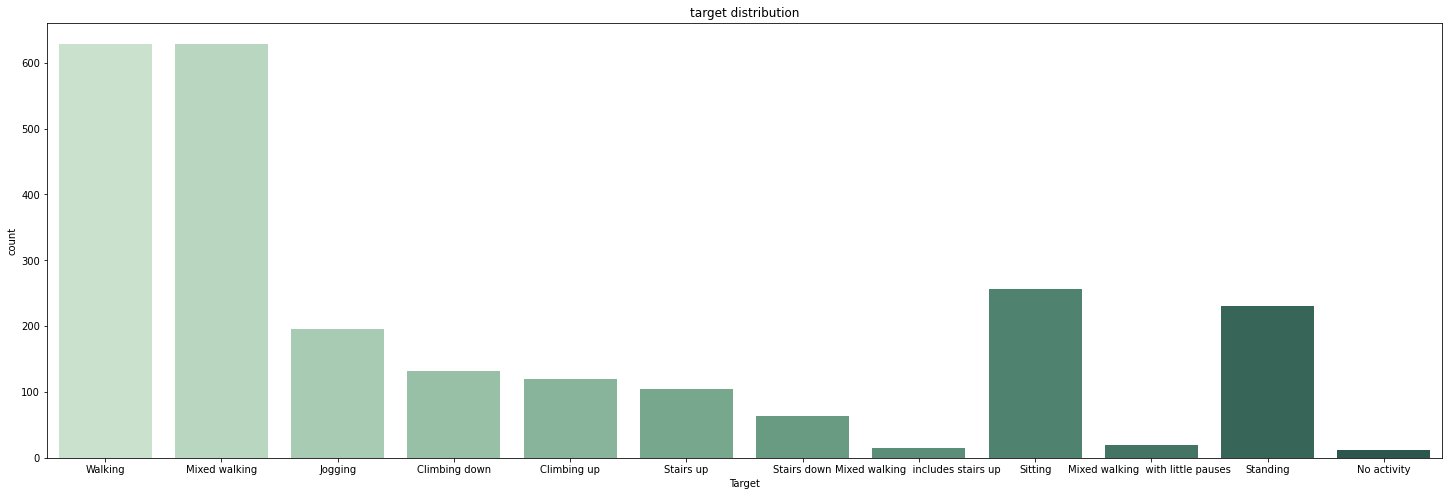

In [4]:
#the distribution of target
plt.figure(figsize=(25,8))
sns.countplot(df.Target, palette="ch:2.5,-.2,dark=.3")
plt.title("target distribution")
plt.show()

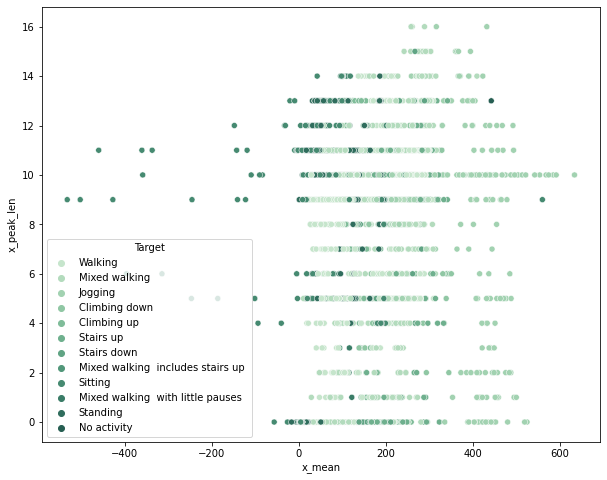

In [14]:
plt.figure(figsize=(10,8))
a = sns.scatterplot(x="x_mean", y="x_peak_len", hue="Target",palette="ch:2.5,-.2,dark=.3"
                     , data=df)

As we can see from the scatterplot below, no-movement activities that are colored in darker green seem to have clustered in the beginning of these two dot streams.

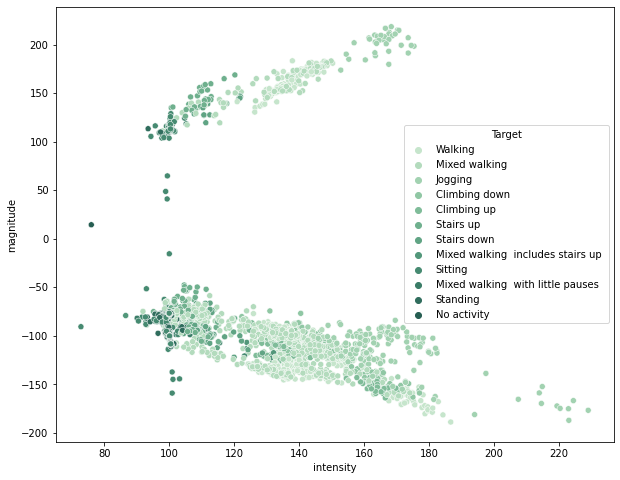

In [15]:
plt.figure(figsize=(10,8))
b=  sns.scatterplot(x="intensity", y="magnitude", hue="Target", palette="ch:2.5,-.2,dark=.3",
                     data=df)

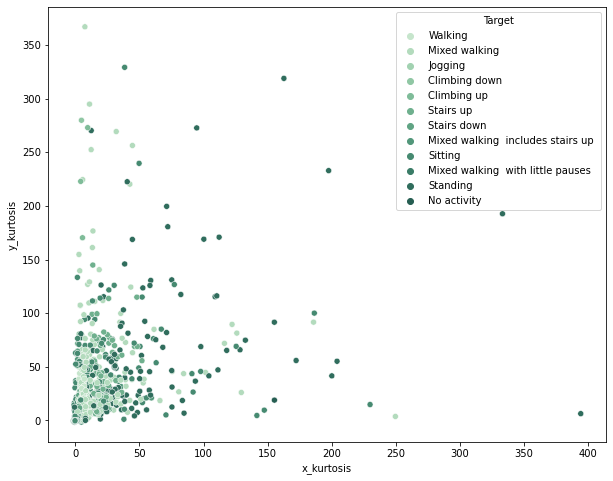

In [16]:
plt.figure(figsize=(10,8))
b=  sns.scatterplot(x="x_kurtosis",y="y_kurtosis", hue="Target", palette="ch:2.5,-.2,dark=.3",
                     data=df)